In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import threading

from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier
#from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier

C:\Users\tipsh\AppData\Local\Temp\ipykernel_16480\3037590594.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:

models_dict = {
    #"SupportVectorMachine": SVC(kernel="linear"),
    #"LogisticRegression": LogisticRegression(solver="saga", n_jobs=-1),
    "ArtificalNeuralNetwork": MLPClassifier(hidden_layer_sizes=30, max_iter=1500),
    "DecisionTree": DecisionTreeClassifier(),
    #"ExtraTree": ExtraTreeClassifier(),
    "RandomForest": RandomForestClassifier(n_jobs=-1),
    "ExtraTrees": ExtraTreesClassifier(n_jobs=-1),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="error", n_jobs=-1),
    #"LightGBM": LGBMClassifier(n_estimators=100, n_jobs=-1),
    #"AdaBoost": AdaBoostClassifier(n_estimators=100, learning_rate=1.0),
    "GradientBoosting": GradientBoostingClassifier(n_estimators=100, learning_rate=1.0),
}

In [3]:
def GetAttributeMapping(data,grp=None,grp_gap=20,map_type=1):
    #print('in mapping')
    #print(data)
    #for col in data.columns[:7]:
    #        print(col,data[col].unique())
    mapping = {}
    mapping['NotA'] = -1
    mapping['NA'] = -1
    mapping[0] = 0
    mapping['Yes'] = 1
    mapping['No'] = 0
    if(map_type==1):
        for col in data.columns[:7]:
            #print(col,data[col].unique())
            if col != 'Year' or col !='Year.1':
                col_un = data[col].unique()
                cnt = 1
                for val in col_un:
                    if(val != 'NotA' or val != 'NA' ):
                        mapping[val] = cnt
                        cnt = cnt + 1
            else:
                for val in col_un:
                    if(val != 'NotA' or val != 'NA' ):
                        mapping[val] = int(val)
        #print(mapping)
        return mapping
    elif(map_type==2):
        for col in data.columns[2:6]:
            #print(col,it_full[col].unique())
            col_un = data[col].unique()
            cnt = 1
            for val in col_un:
                if(val != 'NotA'):
                    mapping[val] = cnt
                    cnt = cnt + 1
        
        for g in grp:
            grp_num = 1
            for member in grp[g]:
                mem_num = 1
                for val in member:
                    mapping[val] = grp_num*grp_gap+mem_num
                    mem_num = mem_num + 1
                grp_num = grp_num + 1
        return mapping
    

In [4]:
trains = ["University2/university_new_test.csv","University1/university_saptarshi_train.csv","Company/it_train_new1.csv"]
tests = ["change_University2.csv","change_University1.csv","change_Company.csv"]
test1 = ["change2_University2.csv","change2_University1.csv","change2_Company.csv"]
data_names = ["University2","University1","Company"]

Exception in thread Thread-7 (run_models):
Traceback (most recent call last):
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2288.0_x64__qbz5n2kfra8p0\Lib\threading.py", line 1045, in _bootstrap_inner
    self.run()
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2288.0_x64__qbz5n2kfra8p0\Lib\threading.py", line 982, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\tipsh\AppData\Local\Temp\ipykernel_16480\1599650438.py", line 12, in run_models
  File "C:\Users\tipsh\AppData\Local\Temp\ipykernel_16480\309219750.py", line 38, in GetAttributeMapping
TypeError: 'NoneType' object is not iterable
C:\Users\tipsh\AppData\Local\Temp\ipykernel_16480\1599650438.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_si

Model: ArtificalNeuralNetwork
Train Accuracy: 0.9937888198757764
Test Accuracy: 0.8840070298769771
Test1 Accuracy: 0.8486988810073961

[[692  35]
 [ 97 314]]
[[166500  26575]
 [  3415   1724]]



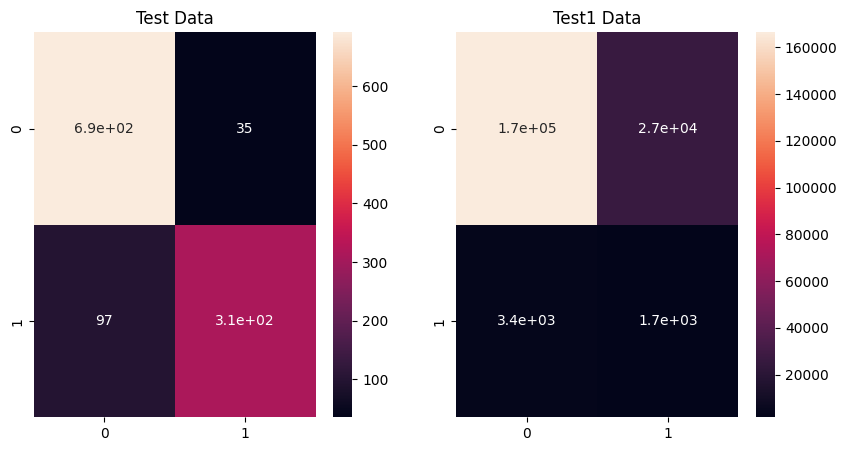

              precision    recall  f1-score   support

           0       0.88      0.95      0.91       727
           1       0.90      0.76      0.83       411

    accuracy                           0.88      1138
   macro avg       0.89      0.86      0.87      1138
weighted avg       0.89      0.88      0.88      1138

              precision    recall  f1-score   support

           0       0.98      0.86      0.92    193075
           1       0.06      0.34      0.10      5139

    accuracy                           0.85    198214
   macro avg       0.52      0.60      0.51    198214
weighted avg       0.96      0.85      0.90    198214

Model: DecisionTree
Train Accuracy: 1.0
Test Accuracy: 0.5105448154657294
Test1 Accuracy: 0.1033277165084202

[[180 547]
 [ 10 401]]
[[ 15873 177202]
 [   531   4608]]



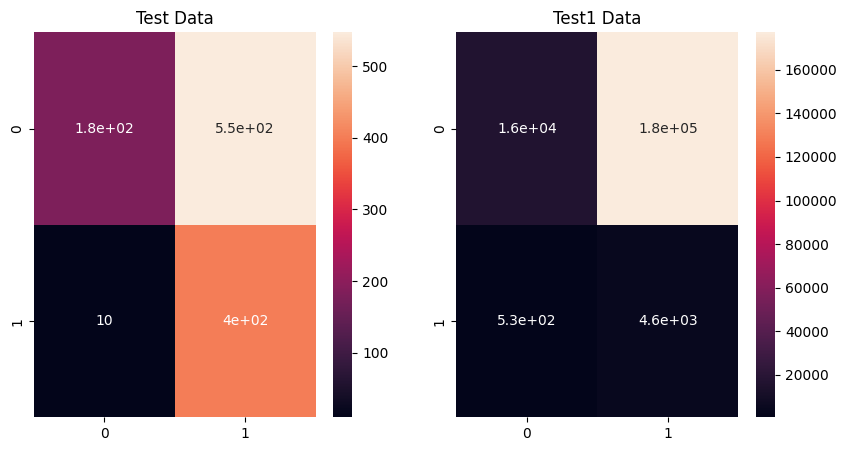

              precision    recall  f1-score   support

           0       0.95      0.25      0.39       727
           1       0.42      0.98      0.59       411

    accuracy                           0.51      1138
   macro avg       0.69      0.61      0.49      1138
weighted avg       0.76      0.51      0.46      1138

              precision    recall  f1-score   support

           0       0.97      0.08      0.15    193075
           1       0.03      0.90      0.05      5139

    accuracy                           0.10    198214
   macro avg       0.50      0.49      0.10    198214
weighted avg       0.94      0.10      0.15    198214

Model: RandomForest
Train Accuracy: 1.0
Test Accuracy: 0.9551845342706503
Test1 Accuracy: 0.5016396420030875

[[706  21]
 [ 30 381]]
[[97251 95824]
 [ 2958  2181]]



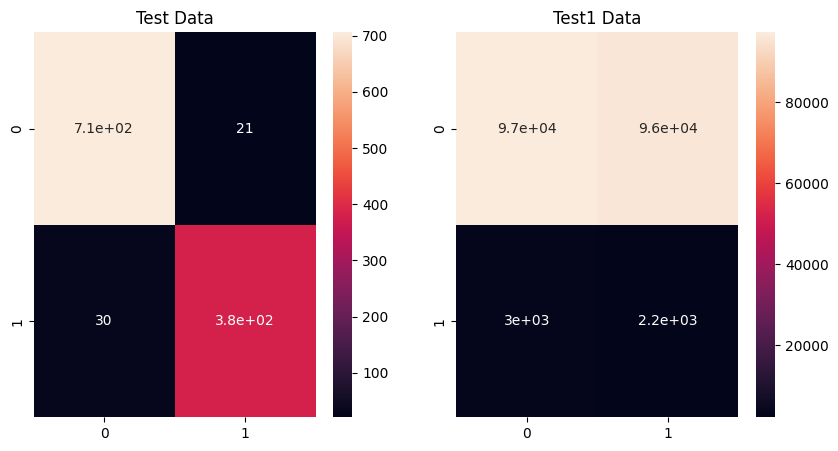

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       727
           1       0.95      0.93      0.94       411

    accuracy                           0.96      1138
   macro avg       0.95      0.95      0.95      1138
weighted avg       0.96      0.96      0.96      1138

              precision    recall  f1-score   support

           0       0.97      0.50      0.66    193075
           1       0.02      0.42      0.04      5139

    accuracy                           0.50    198214
   macro avg       0.50      0.46      0.35    198214
weighted avg       0.95      0.50      0.65    198214

Model: ExtraTrees
Train Accuracy: 1.0
Test Accuracy: 0.9578207381370826
Test1 Accuracy: 0.48737727910238426

[[705  22]
 [ 26 385]]
[[94083 98992]
 [ 2617  2522]]



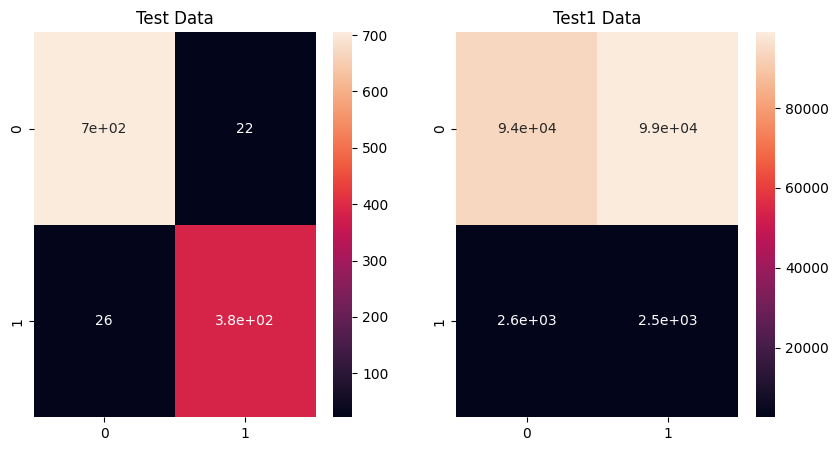

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       727
           1       0.95      0.94      0.94       411

    accuracy                           0.96      1138
   macro avg       0.96      0.95      0.95      1138
weighted avg       0.96      0.96      0.96      1138

              precision    recall  f1-score   support

           0       0.97      0.49      0.65    193075
           1       0.02      0.49      0.05      5139

    accuracy                           0.49    198214
   macro avg       0.50      0.49      0.35    198214
weighted avg       0.95      0.49      0.63    198214

Model: XGBoost
Train Accuracy: 1.0
Test Accuracy: 0.9463971880492091
Test1 Accuracy: 0.28374383242354223

[[696  31]
 [ 30 381]]
[[ 52155 140920]
 [  1052   4087]]



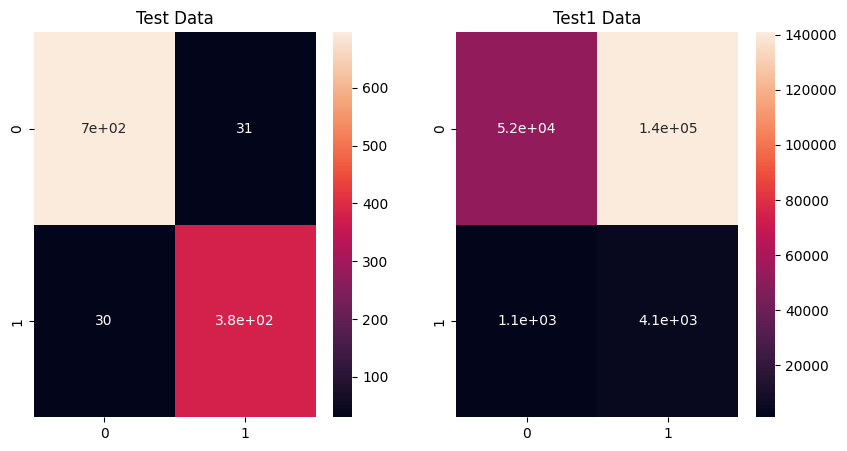

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       727
           1       0.92      0.93      0.93       411

    accuracy                           0.95      1138
   macro avg       0.94      0.94      0.94      1138
weighted avg       0.95      0.95      0.95      1138

              precision    recall  f1-score   support

           0       0.98      0.27      0.42    193075
           1       0.03      0.80      0.05      5139

    accuracy                           0.28    198214
   macro avg       0.50      0.53      0.24    198214
weighted avg       0.96      0.28      0.41    198214

Model: GradientBoosting
Train Accuracy: 1.0
Test Accuracy: 0.664323374340949
Test1 Accuracy: 0.9062629279465628

[[721   6]
 [376  35]]
[[179380  13695]
 [  4885    254]]



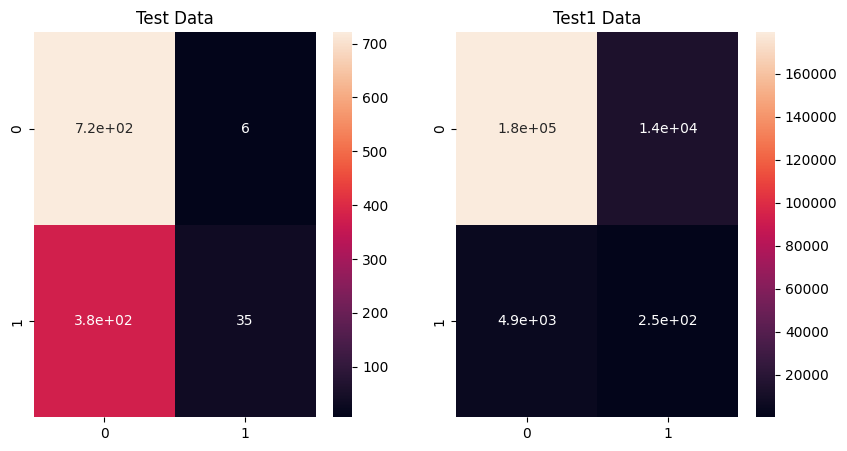

              precision    recall  f1-score   support

           0       0.66      0.99      0.79       727
           1       0.85      0.09      0.15       411

    accuracy                           0.66      1138
   macro avg       0.76      0.54      0.47      1138
weighted avg       0.73      0.66      0.56      1138

              precision    recall  f1-score   support

           0       0.97      0.93      0.95    193075
           1       0.02      0.05      0.03      5139

    accuracy                           0.91    198214
   macro avg       0.50      0.49      0.49    198214
weighted avg       0.95      0.91      0.93    198214



In [ ]:
#Run All Models and print the confusion matrix and write the results to a file
#Compare test and test1 data results in matplotlib

def run_models(train,test,test1, models_dict,i,map_type=1):
    train_data = pd.read_csv(train[i])
    test_data = pd.read_csv(test[i])
    test_data1 = pd.read_csv(test1[i])
    train_data.fillna('NotA', inplace=True)
    data = pd.concat([train_data, test_data,test_data1])      
    
    #map the data
    mapping = GetAttributeMapping(data,map_type=map_type)  
    #encode the data
    data = data.replace(mapping)   
    
    #get the train and test data
    train_data = data.iloc[:len(train_data)]
    test_data = data.iloc[len(train_data):len(train_data)+len(test_data)]
    test_data1 = data.iloc[len(train_data)+len(test_data):]
    
    if(i==0):
        train_data['Year'] = train_data['Year'].replace('NotA',-1)
        train_data['Year'] = train_data['Year'].astype(int)
        train_data['Year.1'] = train_data['Year.1'].replace('NotA',-1)
        train_data['Year.1'] = train_data['Year.1'].astype(int)
        test_data['Year'] = test_data['Year'].replace('NotA',-1)
        test_data['Year'] = test_data['Year'].astype(int)
        test_data['Year.1'] = test_data['Year.1'].replace('NotA',-1)
        test_data['Year.1'] = test_data['Year.1'].astype(int)
        test_data1['Year'] = test_data1['Year'].replace('NotA',-1)
        test_data1['Year'] = test_data1['Year'].astype(int)
        test_data1['Year.1'] = test_data1['Year.1'].replace('NotA',-1)
        test_data1['Year.1'] = test_data1['Year.1'].astype(int)   
    
    X_train = train_data.drop(columns=["Access"])
    y_train = train_data["Access"]
    X_test = test_data.drop(columns=["Access"])
    y_test = test_data["Access"]
    X_test1 = test_data1.drop(columns=["Access"])
    y_test1 = test_data1["Access"]
    
    for model_name, model in models_dict.items():
        model.fit(X_train, y_train)
        print(f"Model: {model_name}")
        print(f"Train Accuracy: {model.score(X_train, y_train)}")
        print(f"Test Accuracy: {model.score(X_test, y_test)}")
        if(not X_test1.empty):
            print(f"Test1 Accuracy: {model.score(X_test1, y_test1)}")
        print("")
        y_pred = model.predict(X_test)
        if(not X_test1.empty):
            y_pred1 = model.predict(X_test1)
        
        #write confusion matrix to file

        cm = confusion_matrix(y_test, y_pred)
        print(cm)
        if(not X_test1.empty):
            cm1 = confusion_matrix(y_test1, y_pred1)
            print(cm1)
       
        
        print("")
        
        #plot confusion matrix
        fig, ax = plt.subplots(1,2,figsize=(10,5))
        sns.heatmap(cm, annot=True, ax=ax[0])
        if(not X_test1.empty):
            sns.heatmap(cm1, annot=True, ax=ax[1])
        ax[0].set_title('Test Data')
        ax[1].set_title('Test1 Data')
        plt.show()
        
        #Print precision, recall, f1-score
        from sklearn.metrics import classification_report
        print(classification_report(y_test, y_pred))
        if(not X_test1.empty):
            print(classification_report(y_test1, y_pred1))
        
        #write to file
        
        with open(f"{data_names[i]}_naive_results.txt", "a") as f:
            f.write(f"Model: {model_name}\n")
            f.write(f"Train Accuracy: {model.score(X_train, y_train)}\n")
            f.write(f"Test Accuracy: {model.score(X_test, y_test)}\n")
            if(not X_test1.empty):
                f.write(f"Test1 Accuracy: {model.score(X_test1, y_test1)}\n")
            f.write(f"Confusion Matrix Test Data:\n{cm}\n")
            if(not X_test1.empty):
                f.write(f"Confusion Matrix Test1 Data:\n{cm1}\n")
            f.write(f"Classification Report Test Data:\n{classification_report(y_test, y_pred)}\n")
            if(not X_test1.empty):
                f.write(f"Classification Report Test1 Data:\n{classification_report(y_test1, y_pred1)}\n")
            f.write("\n")
        
thread1 = threading.Thread(target=run_models, args=(trains,tests,test1,models_dict,0,1))
thread2 = threading.Thread(target=run_models, args=(trains,tests,test1,models_dict,1,1))
thread3 = threading.Thread(target=run_models, args=(trains,tests,test1,models_dict,2,2))

thread1.start()
thread2.start()
thread3.start()

In [6]:
def same_conditions(col1,col2):
    if ((col1 == -1) or (col2 == -1)):
        return 2
    elif (col1==col2):
        return 1
    else:
        return 0

def chk_nota(col):
    if(col==-1):
        return 1
    else:
        return 0

In [7]:
def GetPreparedDataUni(train_data,test_data,attr_grp,prep_type=4):
    """_summary_

    Args:
        train_data (df): training data
        test_data (df): testing data
        attr_grp (dict): attribute grouping
        prep_type (int, optional): Defaults to 4. 1.Naive
                                        2.ARFE
                                        3.AVC
                                        4.Naive+ARFE
                                        5.Naive+NACol
    return:
        df: prepared data
    """
    #print('in prepare data')
    data = pd.concat([train_data,test_data],axis=0)
    if(prep_type==1):#Naive
        map_type = 1
        mapping = GetAttributeMapping(data,grp=attr_grp,map_type=map_type)
        print(mapping)
        data_encoded = data.replace(mapping)
    elif(prep_type==2):#Columns for same attribute values in subject and object
        map_type = 1
        mapping = GetAttributeMapping(data,grp=attr_grp,map_type=map_type)
        data_encoded = data.replace(mapping)
        data_encoded['sameCourse'] = data_encoded.apply(lambda x: same_conditions(x['Course'], x['Course.1']), axis=1)
        data_encoded['sameDep'] = data_encoded.apply(lambda x: same_conditions(x['Department'], x['Department.1']), axis=1)
        data_encoded['sameDeg'] = data_encoded.apply(lambda x: same_conditions(x['Degree'], x['Degree.1']), axis=1)
        data_encoded['sameYr'] = data_encoded.apply(lambda x: same_conditions(x['Year'], x['Year.1']), axis=1)
        data_encoded = data_encoded.drop('Department',axis=1)
        data_encoded = data_encoded.drop('Department.1',axis=1)
        data_encoded = data_encoded.drop('Course',axis=1)
        data_encoded = data_encoded.drop('Course.1',axis=1)
        data_encoded = data_encoded.drop('Degree',axis=1)
        data_encoded = data_encoded.drop('Degree.1',axis=1)
        data_encoded = data_encoded.drop('Year',axis=1)
        data_encoded = data_encoded.drop('Year.1',axis=1)
    elif(prep_type==3):#Grouping of attributes
        map_type = 2
        mapping = GetAttributeMapping(data,grp=attr_grp,map_type=map_type)
        data_encoded = data.replace(mapping)
    elif(prep_type==4):#Grouping of attributes + Columns for same attribute values in subject and object
        map_type = 2
        mapping = GetAttributeMapping(data,grp=attr_grp,map_type=map_type)
        data_encoded = data.replace(mapping)
        data_encoded['sameCourse'] = data_encoded.apply(lambda x: same_conditions(x['Course'], x['Course.1']), axis=1)
        data_encoded['sameDep'] = data_encoded.apply(lambda x: same_conditions(x['Department'], x['Department.1']), axis=1)
        data_encoded['sameDeg'] = data_encoded.apply(lambda x: same_conditions(x['Degree'], x['Degree.1']), axis=1)
        data_encoded['sameYr'] = data_encoded.apply(lambda x: same_conditions(x['Year'], x['Year.1']), axis=1)
        data_encoded = data_encoded.drop('Department',axis=1)
        data_encoded = data_encoded.drop('Department.1',axis=1)
        data_encoded = data_encoded.drop('Course',axis=1)
        data_encoded = data_encoded.drop('Course.1',axis=1)
        data_encoded = data_encoded.drop('Degree',axis=1)
        data_encoded = data_encoded.drop('Degree.1',axis=1)
        data_encoded = data_encoded.drop('Year',axis=1)
        data_encoded = data_encoded.drop('Year.1',axis=1)
    elif(prep_type==5):#Naive+NACol
        map_type = 1
        mapping = GetAttributeMapping(data,grp=attr_grp,map_type=map_type)
        data_encoded = data.replace(mapping)
        data_encoded['Post_NA'] = data_encoded.apply(lambda x: chk_nota(x['Post']), axis=1)
        data_encoded['Course_NA'] = data_encoded.apply(lambda x: chk_nota(x['Course']), axis=1)
        data_encoded['Degree_NA'] = data_encoded.apply(lambda x: chk_nota(x['Degree']), axis=1)
        data_encoded['Year_NA'] = data_encoded.apply(lambda x: chk_nota(x['Year']), axis=1)
        data_encoded['Course.1_NA'] = data_encoded.apply(lambda x: chk_nota(x['Course.1']), axis=1)
        data_encoded['Year.1_NA'] = data_encoded.apply(lambda x: chk_nota(x['Year.1']), axis=1)
    X = data_encoded.loc[:, data_encoded.columns != 'Access']
    y = data_encoded.loc[:, data_encoded.columns == 'Access']
    
    #print(y)
    
    X_train = X.head(train_data.shape[0])
    X_test = X.tail(test_data.shape[0])
    y_train = y.head(train_data.shape[0])
    y_test = y.tail(test_data.shape[0])
    #print(y_train['Access'].unique(),y_test['Access'].unique())
    return X_train, X_test, y_train, y_test

def GetPreparedDataIT(train_data,test_data,attr_grp,prep_type=4):
    data = pd.concat([train_data,test_data],axis=0)
    #print(data.columns)
    #exit(0)
    if(prep_type==1):#Naive
        map_type = 1
        mapping = GetAttributeMapping(data,grp=attr_grp,map_type=map_type)
        print(mapping)
        data_encoded = data.replace(mapping)
    elif(prep_type==2):#Columns for same attribute values in subject and object
        map_type = 1
        mapping = GetAttributeMapping(data,grp=attr_grp,map_type=map_type)
        data_encoded = data.replace(mapping)
        data_encoded['sameProj'] = data_encoded.apply(lambda x: same_conditions(x['Project_name'], x['Project_Name']), axis=1)
        data_encoded['sameDep'] = data_encoded.apply(lambda x: same_conditions(x['Department'], x['Department.1']), axis=1)
        data_encoded = data_encoded.drop('Department',axis=1)
        data_encoded = data_encoded.drop('Department.1',axis=1)
        data_encoded = data_encoded.drop('Project_name',axis=1)
        data_encoded = data_encoded.drop('Project_Name',axis=1)
    elif(prep_type==3):#Grouping of attributes
        map_type = 2
        mapping = GetAttributeMapping(data,grp=attr_grp,map_type=map_type)
        data_encoded = data.replace(mapping)
    elif(prep_type==4):#Grouping of attributes + Columns for same attribute values in subject and object
        map_type = 2
        mapping = GetAttributeMapping(data,grp=attr_grp,map_type=map_type)
        data_encoded = data.replace(mapping)
        data_encoded['sameProj'] = data_encoded.apply(lambda x: same_conditions(x['Project_name'], x['Project_Name']), axis=1)
        data_encoded['sameDep'] = data_encoded.apply(lambda x: same_conditions(x['Department'], x['Department.1']), axis=1)
        data_encoded = data_encoded.drop('Department',axis=1)
        data_encoded = data_encoded.drop('Department.1',axis=1)
        data_encoded = data_encoded.drop('Project_name',axis=1)
        data_encoded = data_encoded.drop('Project_Name',axis=1)
    elif(prep_type==5):#Naive+NACol
        map_type = 1
        mapping = GetAttributeMapping(data,grp=attr_grp,map_type=map_type)
        data_encoded = data.replace(mapping)
        data_encoded['Proj_NA'] = data_encoded.apply(lambda x: chk_nota(x['Project_name']), axis=1)
    X = data_encoded.loc[:, data_encoded.columns != 'Access']
    y = data_encoded.loc[:, data_encoded.columns == 'Access']
    
    #print(y)
    
    X_train = X.head(train_data.shape[0])
    X_test = X.tail(test_data.shape[0])
    y_train = y.head(train_data.shape[0])
    y_test = y.tail(test_data.shape[0])
    #print(y_train['Access'].unique(),y_test['Access'].unique())
    return X_train, X_test, y_train, y_test

In [8]:
designation_grp = [['CEO'],
                   ['CTO'],
                   ['FINANCE MANAGER'],
                   ['HR MANAGER'],
                   ['DESIGNER','PROGRAMMER','SDE','TESTER'],
                   ['PROJECT_MANAGER','SYSTEM_ARCHITECT'],
                   ['PROJECT_LEADER','PRINCIPAL'],
                   ['IT_MANAGER','SECURTY_ENGINEER'],
                   ['NETWORK_ENGINEER'],
                   ['DATABASE_ENGINEER']
                  ]

resource_grp = [['EMP_DETAIL'],
                ['CLIENT_DETAIL'],
                ['SALARY_DETAIL','PF_DETAIL'],
                ['PROJECT_DETAIL','PROJECT_PLAN'],
                ['NETWORK_SETUP'],
                ['DATABASE'],
                ['PROJECT_COST','ALLOCATED_FUND','FINANCE_REPORT','TAX_DETAIL'],
                ['SERVER','STORAGE','GPU']
               ]

attr_grp_it={}
attr_grp_it['DESIGNATION'] = designation_grp
attr_grp_it['Resource'] = resource_grp

designation_grp = [['Accountant'],
                   ['Faculty'],
                   ['Placement_coordinator','Stud_representative'],
                   ['Stud'],
                   ['Teaching_assis']
                  ]

post_grp = [['Associate','Assistant','Temporary'],
            ['Graduate','Undergraduate'],
            ['PhD'],
            ['Non_Teaching']            
               ]

type_grp = [['assgn','report_assgn'],
            ['ac_details','budget','payment_details'],
            ['mids_paper','compre_paper','answer_sheet'],
            ['result'],
            ['attendance'],['placement_details','grade_book']
           ]

attr_grp_uni={}
attr_grp_uni['DESIGNATION'] = designation_grp
attr_grp_uni['Post'] = post_grp
attr_grp_uni['Type'] = type_grp


In [13]:
#Run All Models and print the confusion matrix and write the results to a file
#Compare test and test1 data results in matplotlib

def run_models(train,test,models_dict,i,prep_type,prep_model,attr_grp=None):
    train_data = pd.read_csv(train[i])
    test_data = pd.read_csv(test[i])
    X_train, X_test, y_train, y_test = prep_model(train_data,test_data,attr_grp,prep_type)
    for model_name, model in models_dict.items():
        model.fit(X_train, y_train)
        print(f"Model: {model_name}")
        print(f"Train Accuracy: {model.score(X_train, y_train)}")
        print(f"Test Accuracy: {model.score(X_test, y_test)}")
        print("")
        y_pred = model.predict(X_test)
        
        #write confusion matrix to file

        cm = confusion_matrix(y_test, y_pred)
        print(cm)
        print("")
        
        #plot confusion matrix
        fig, ax = plt.subplots(1,figsize=(10,5))
        sns.heatmap(cm, annot=True, ax=ax)
        ax.set_title('Test Data')
        plt.show()
        
        #Print precision, recall, f1-score
        from sklearn.metrics import classification_report
        print(classification_report(y_test, y_pred))
        
        
        #write to file
        
        # with open(f"{data_names[i]}_naive_results.txt", "a") as f:
        #     f.write(f"Model: {model_name}\n")
        #     f.write(f"Train Accuracy: {model.score(X_train, y_train)}\n")
        #     f.write(f"Test Accuracy: {model.score(X_test, y_test)}\n")
        #     f.write(f"Confusion Matrix Test Data:\n{cm}\n")
        #     f.write(f"Classification Report Test Data:\n{classification_report(y_test, y_pred)}\n")
        #     f.write("\n")
        
# One-hot encode categorical variables
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)



{'NotA': -1, 'NA': -1, 0: 0, 'Yes': 1, 'No': 0, 'Stud': 1, 'Faculty': 2, 'Placement_coordinator': 3, 'Teaching_assis': 4, 'Accountant': 5, 'Stud_representative': 6, 'assgn': 1, 'mids_paper': 2, 'answer_sheet': 5, 'compre_paper': 3, 'result': 4, 'Undergraduate': 1, 'Associate': 2, 'Temporary': 3, 'Assistant': 4, 'Graduate': 5, 'PhD': 6, 'Non_Teaching': 7, 'placement_details': 7, 'attendance': 6, 'CSE_31': 1, 'Mech_31': 2, 'CE_1': 3, 'ECE_6': 4, 'IT_1': 5, 'IT_2': 6, 'IT_3': 7, 'IT_4': 8, 'IT_5': 9, 'IT_6': 10, 'IT_7': 11, 'IT_8': 12, 'IT_9': 13, 'IT_10': 14, 'IT_11': 15, 'IT_12': 16, 'IT_13': 17, 'IT_14': 18, 'IT_15': 19, 'IT_16': 20, 'IT_17': 21, 'IT_18': 22, 'IT_19': 23, 'IT_20': 24, nan: 2, 'CSE_1': 26, 'CSE_2': 27, 'CSE_3': 28, 'CSE_4': 29, 'CSE_5': 30, 'CSE_6': 31, 'CSE_7': 32, 'CSE_8': 33, 'CSE_9': 34, 'CSE_10': 35, 'CSE_11': 36, 'CSE_12': 37, 'CSE_13': 38, 'CSE_14': 39, 'CSE_15': 40, 'CSE_16': 41, 'CSE_17': 42, 'CSE_18': 43, 'CSE_19': 44, 'CSE_20': 45, 'CSE_21': 46, 'CSE_22': 47,

C:\Users\tipsh\AppData\Local\Temp\ipykernel_16480\3271267811.py:22: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_encoded = data.replace(mapping)


ValueError: could not convert string to float: 'Mech_4'